<a href="https://colab.research.google.com/github/Dlogical23/logistical-regresson/blob/main/ClassifyCap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# prompt: unzip folder python

import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/iris.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/iris')


In [5]:
import pandas as pd

In [8]:
# prompt: inspect data when there is no .csv file only.data

import pandas as pd

# Assuming 'iris.data' is in the extracted directory
try:
  data = pd.read_csv('/content/drive/MyDrive/iris/iris.data', header=None)
  print(data.head()) # Display first few rows
  print(data.info()) # Summary of data types and non-null values
  print(data.describe()) # Descriptive statistics
except FileNotFoundError:
  print("Error: 'iris.data' not found in the specified directory.")
except Exception as e:
  print(f"An error occurred: {e}")

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
                0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1

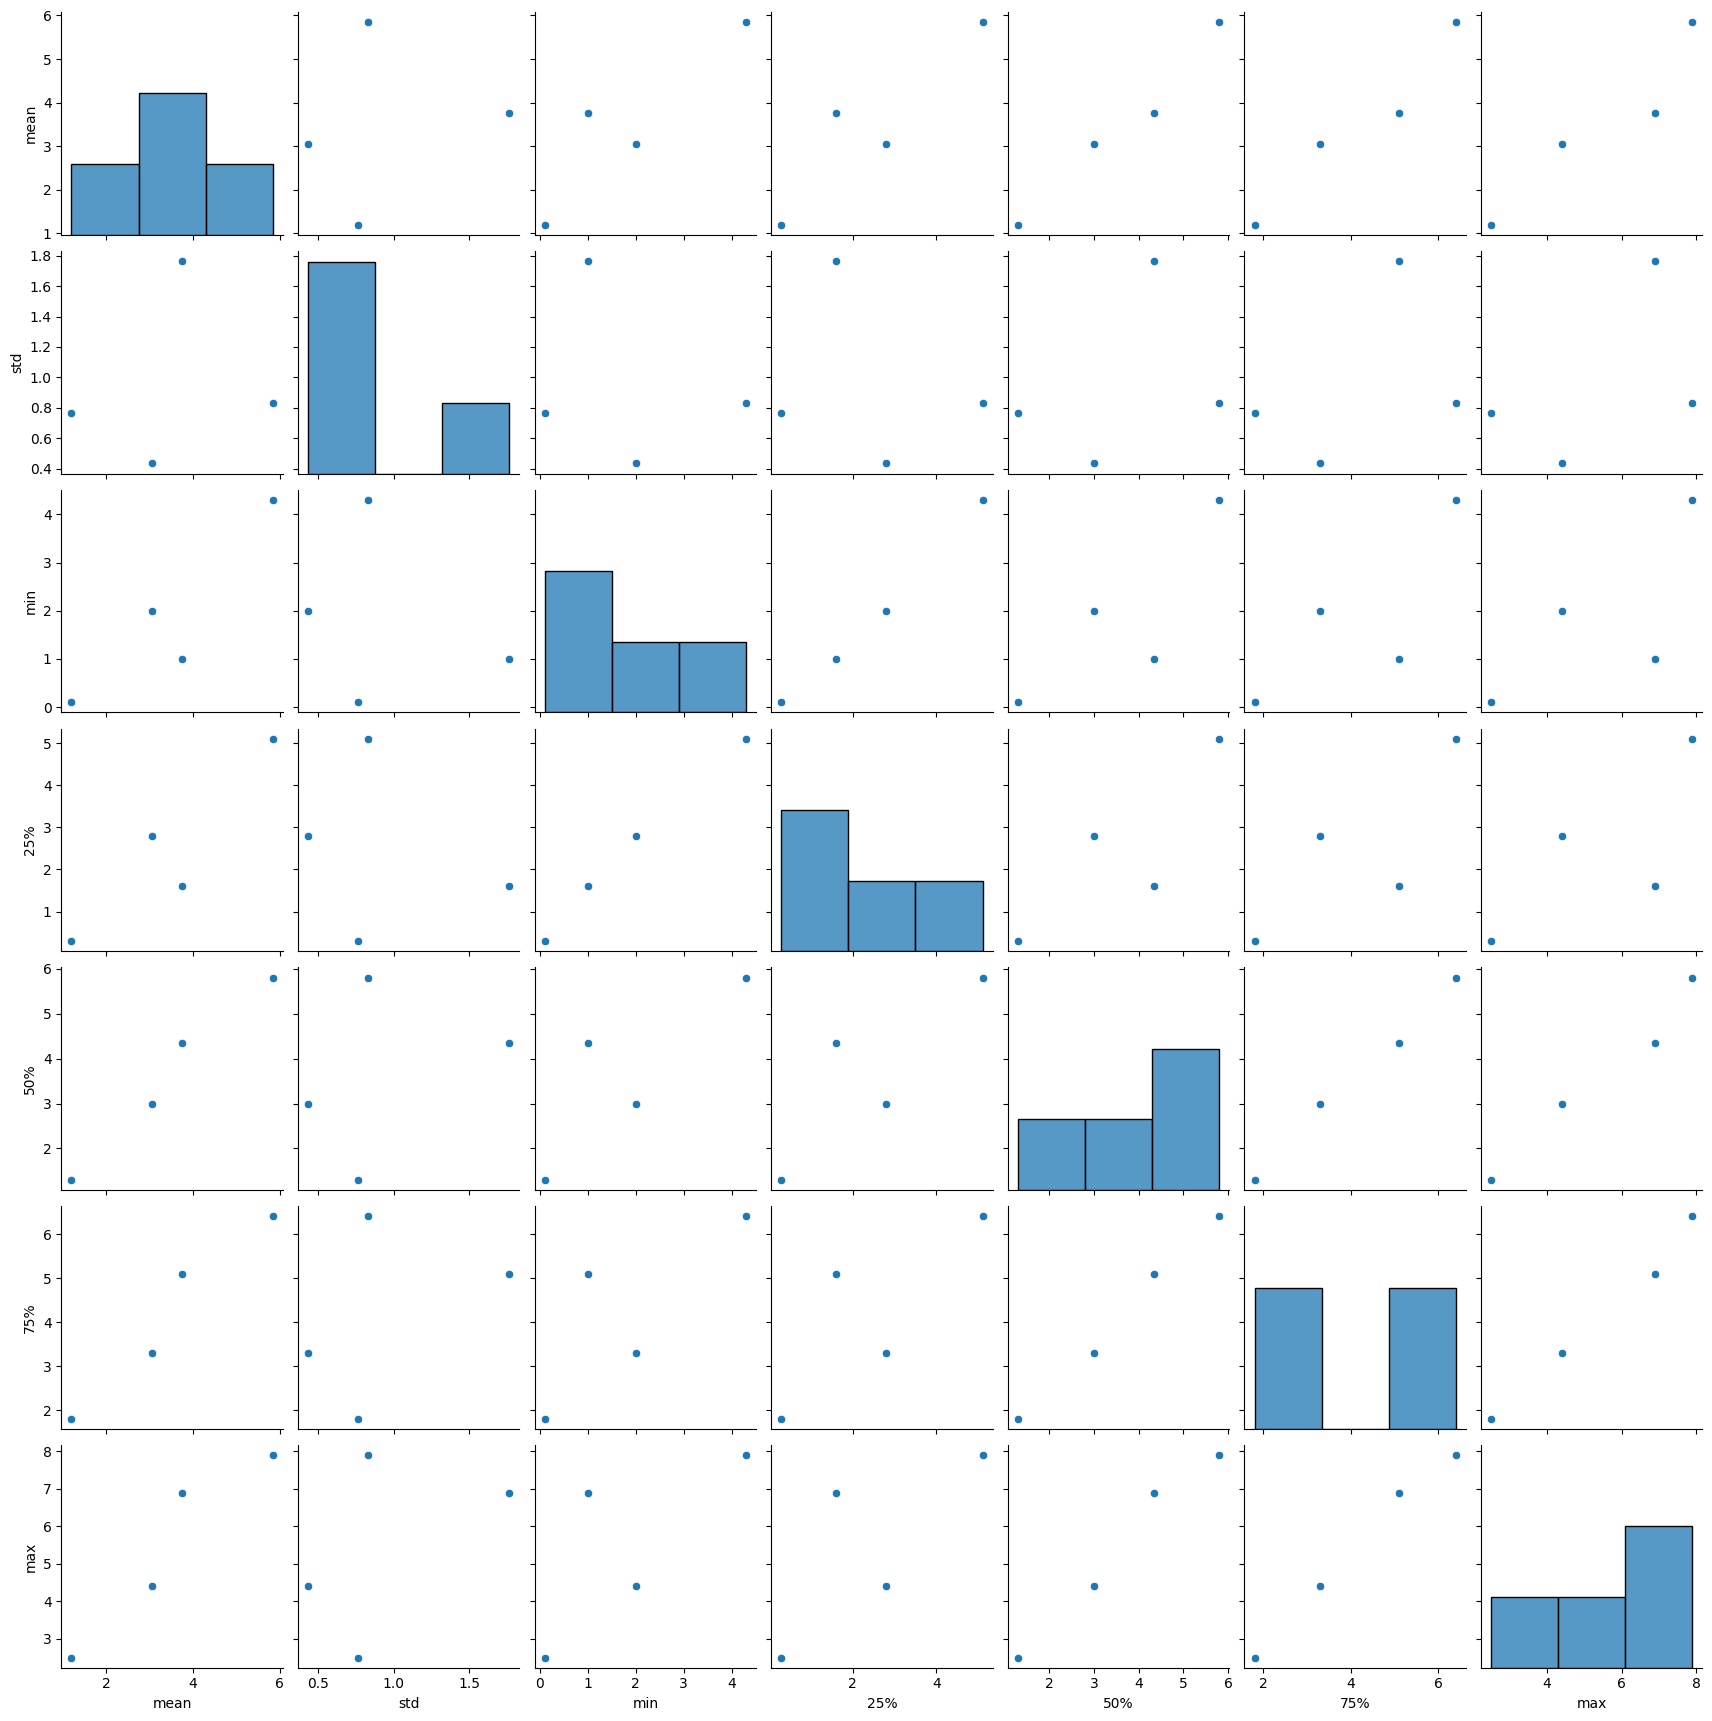

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# ... (previous code) ...

# If you want to use the descriptive statistics in the pairplot:
# First, calculate the descriptive statistics and store them in a variable
desc_stats = data.describe()

# Transpose the desc_stats DataFrame to make the statistics the columns
desc_stats = desc_stats.T

# Now you can access the statistics as columns
sns.pairplot(desc_stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max']])  # No hue for this case
plt.show()

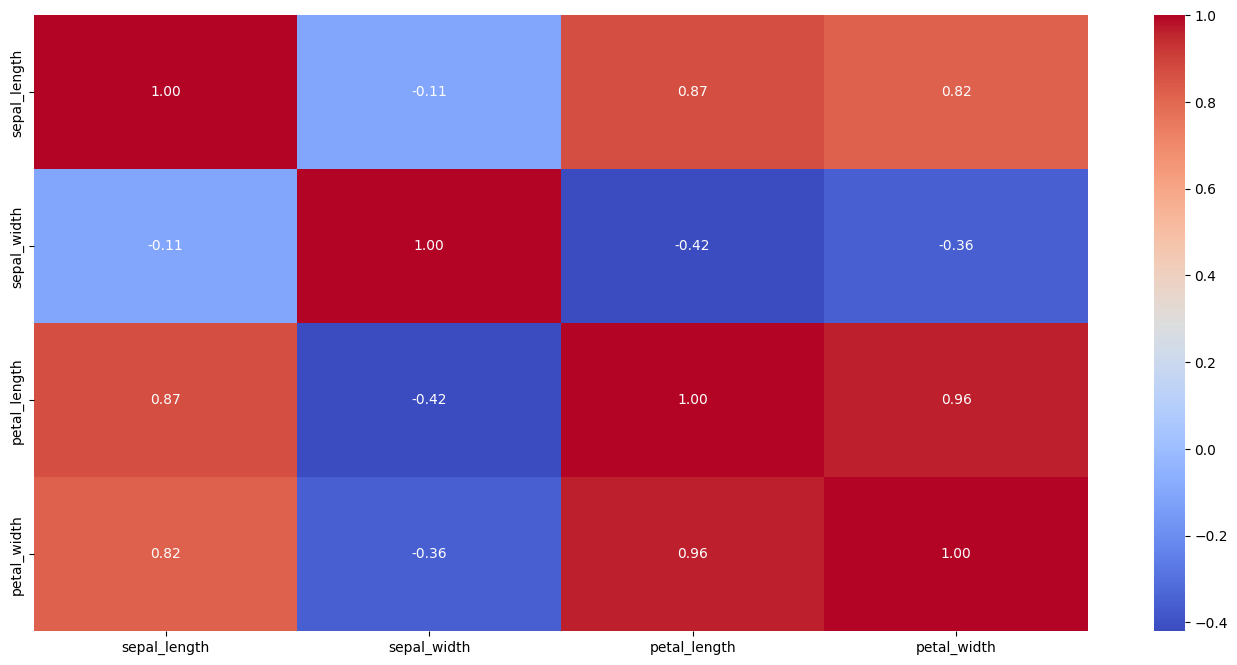

In [24]:
# Correlation matrix for numerical features only
# Assuming the first 4 columns are your numerical features
# Get the column names of the first 4 columns
numerical_cols = data.columns[:4]

# Use the column names to select the data for correlation
corr = data[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(17, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

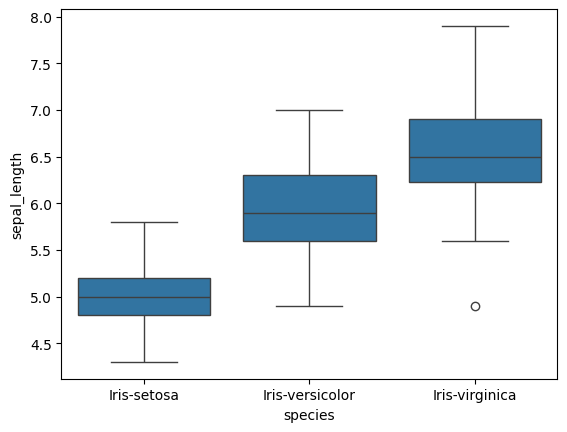

In [29]:
# Boxplot for 'mean radius' grouped by 'target'
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your target variable is in the last column and named something else, like 'species'
# and your feature column is the first column (index 0)
# Rename columns for clarity
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

sns.boxplot(x='species', y='sepal_length', data=data)  # Changed to 'species' and 'sepal_length'
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

# Assuming 'species' is your target variable and the rest are features
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # Features
y = data['species']  # Target variable

# Split the data (using 80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting datasets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (120, 4)
Testing data shape: (30, 4)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the logistic regression model with 'liblinear' solver
log_reg = LogisticRegression(solver='liblinear')

# Train the model using the training data
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)

Model accuracy: 1.0


In [33]:
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model accuracy (already done above)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [34]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [35]:
# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Extract coefficients
coefficients = log_reg.coef_[0]

In [37]:
# Step 2: Normalize the coefficients by the standard deviation of each feature in the training data
feature_std = np.std(X_train, axis=0)
normalized_coefficients = coefficients / feature_std

In [38]:
# Step 3: Sort feature names and coefficients by absolute value of coefficients
feature_names = X.columns
sorted_indices = np.argsort(np.abs(normalized_coefficients))[::-1]

In [39]:
# Sorted feature names and coefficients
sorted_feature_names = feature_names[sorted_indices]
sorted_coefficients = normalized_coefficients[sorted_indices]

<ipython-input-39-984ce1858d6a>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_coefficients = normalized_coefficients[sorted_indices]


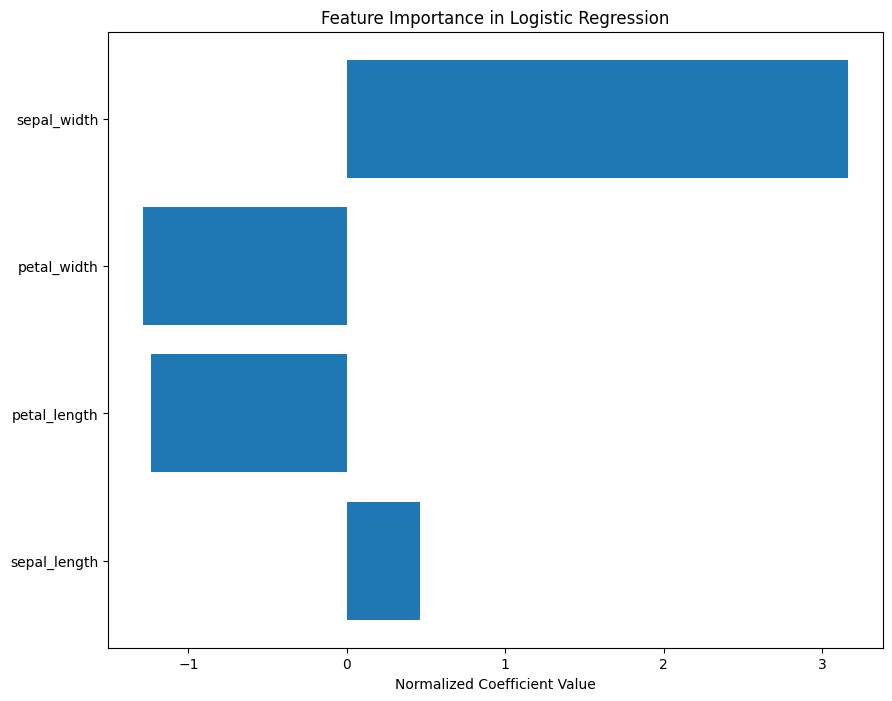

In [40]:
# Step 4: Visualize the feature importances using a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_names, sorted_coefficients)
plt.xlabel('Normalized Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()